# Building Convolutional Autoencoder

Just like we learned how to implement autoencoder in the previous section, implementing Convolutional Autoencoder (CAE) is also the same but the only difference is here we use convolutional layers in the encoder and decoder instead of a feedforward network.  We will use the same MNIST dataset to reconstruct the images using CAE.

## Import the libraries

First, let us import all the necessary libraries:


In [ ]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras import backend as K

import tensorflow.compat.v1 as tf; tf.disable_v2_behavior()
tf.logging.set_verbosity(tf.logging.ERROR)

#plotting
import matplotlib.pyplot as plt
%matplotlib inline

#dataset
from keras.datasets import mnist
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


## Read and reshape the dataset,

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Normalize the data by dividing with max pixel value which is 255:

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

Reshape the images:

In [ ]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

Shape of our dataset:

In [ ]:
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


Let us define the shape of our input image:

In [ ]:
input_image = Input(shape=(28, 28, 1))

# Define the Encoder

Now let us define our encoder block. Unlike vanilla autoencoders where we use feedforward networks, here we use convolutional network so our encoder block comprises of three convolutional layer followed by a max pooling layer with relu activations.

Define the first convolutional layer followed by a pooling operation:



In [ ]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_image)
x = MaxPooling2D((2, 2), padding='same')(x)

Second convolutional layer with a max pooling layer:

In [ ]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

Final convolutional layer with max pooling operation:

In [ ]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoder = MaxPooling2D((2, 2), padding='same')(x)

## Define the decoder
Now we define our decoder block, we perform the deconvolution operation with three layers i.e we upsample
the encodings create by the encoder and reconstructs the original image.

Define the first convolutional layer followed by upsampling:


In [ ]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder)
x = UpSampling2D((2, 2))(x)

Second convolutional layer with upsampling:

In [ ]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

Define the final layer:

In [ ]:
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoder = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

## Build the model

Define the model which takes an input image and returns the images generated by the decoder which is reconstructed images:

In [ ]:
model = Model(input_image, decoder)

Compile the model with loss as binary cross entropy and adadelta as an optimizer:

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')

Train the model:

In [ ]:
model.fit(x_train, x_train, epochs=30,batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.2120 - val_loss: 0.1449
Epoch 2/30
60000/60000 [==============================] - 100s 2ms/sample - loss: 0.1356 - val_loss: 0.1270
Epoch 3/30
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.1242 - val_loss: 0.1193
Epoch 4/30
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.1182 - val_loss: 0.1158
Epoch 5/30
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.1148 - val_loss: 0.1120
Epoch 6/30
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.1120 - val_loss: 0.1103
Epoch 7/30
60000/60000 [==============================] - 95s 2ms/sample - loss: 0.1100 - val_loss: 0.1078
Epoch 8/30
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.1083 - val_loss: 0.1066
Epoch 9/30
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.1070 - va

## Reconstruct the images

Reconstruct images using the trained model:

In [ ]:
reconstructed_images = model.predict(x_test)

Plot the actual images:

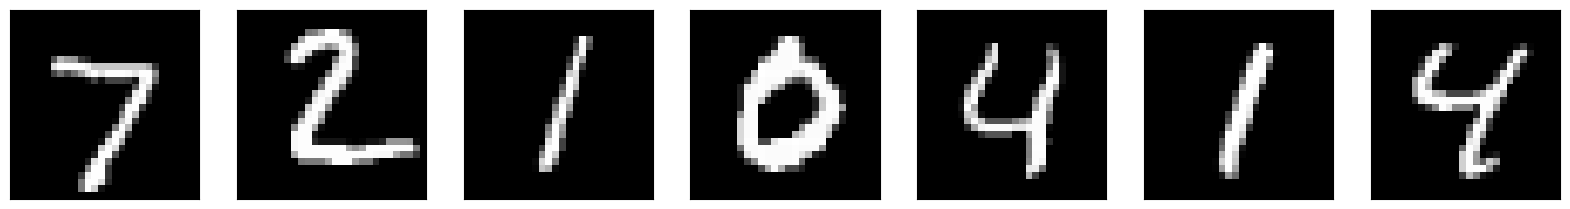

In [ ]:
n = 7
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Plot the reconstructed images:

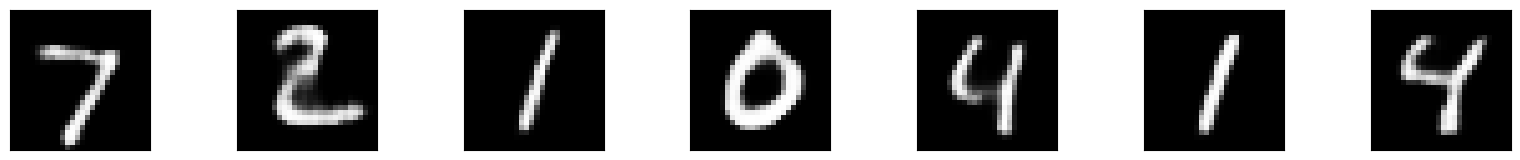

In [ ]:
n = 7
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(reconstructed_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


Now that we learned how convolutional autoencoders works, in the next section we will learn about denoising autoencoders which is used to remove noise from the input.